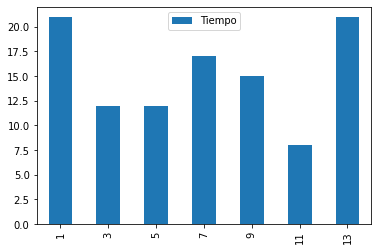

In [37]:
import time
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

path = "datos_de_prueba.csv"  

datos = pd.read_csv(path) 

partidas_lunes = datos[
    (datos["Tiempo"].apply(lambda x: datetime.fromtimestamp(x).weekday()) == 2) & ((datos["Nombre de evento"] == "inicio_partida") | (datos["Nombre de evento"] == "fin")) ]

partidas = partidas_lunes.groupby(["Partida"])["Tiempo"].diff().reset_index()
partidas.drop(['index'], axis = 'columns', inplace=True)
partidas = partidas[partidas['Tiempo'].notna()].plot(kind="bar")

Pruebo con esta condicion datos["Tiempo"].apply(lambda x: datetime.fromtimestamp(x).weekday()) == 2) ya que en el csv de datos, solo tenia cargadas partidas que se jugaron un Miercoles (Dia numero 2 en el arreglo de dias ). Para que busque partidas que se jugaron los lunes deberia comprobar que datos["Tiempo"].apply(lambda x: datetime.fromtimestamp(x).weekday()) == 0. Sea igual a 0, ya que Lunes es el dia 0 en el arreglo de dias